In [1]:
import pandas as pd
import csv

data = pd.read_csv('auctions.csv')
data

,auction_id,RoR,STR,BPL,lots,product_types,avg_start_bid,avg_reserve,auction_mech,state
0,100,1.026112,0.503097,8.324074,108,0.768519,0.000000,10568.250000,SealedBid,MD
1,101,1.407666,1.000000,5.571429,7,1.000000,0.000000,4805.617249,EnglishForward,TX
2,102,0.000000,0.000000,0.000000,2,1.000000,0.000000,3550.000000,SealedBid,MD
3,103,0.884021,1.000000,1.000000,3,0.333333,0.000000,7693.876790,FixedPrice,NE
4,104,0.972593,1.000000,4.533333,90,0.611111,0.000000,8661.111111,EnglishForward,NY
...,...,...,...,...,...,...,...,...,...,...
6215,6315,1.010807,0.280132,1.571429,115,0.796610,0.998503,15009.730254,EnglishForward,FL
6216,6316,0.997599,1.000000,1.000000,10,1.000000,0.000000,15296.658008,FixedPrice,FL
6217,6317,0.942716,0.333875,6.200000,45,0.844444,0.000000,12188.244667,EnglishForward,DE
6218,6318,1.000787,0.509448,6.758065,62,0.338710,0.000000,14172.611210,EnglishForward,NV


In [3]:
data.rename(columns = {'RoR': 'return_on_reserve',
                      'STR': 'lots_sold',
                      'BPL': 'bidders_per_lot'}, inplace = True)
data.head()

,auction_id,return_on_reserve,lots_sold,bidders_per_lot,lots,product_types,avg_start_bid,avg_reserve,auction_mech,state
0,100,1.026112,0.503097,8.324074,108,0.768519,0.0,10568.250000,SealedBid,MD
1,101,1.407666,1.000000,5.571429,7,1.000000,0.0,4805.617249,EnglishForward,TX
2,102,0.000000,0.000000,0.000000,2,1.000000,0.0,3550.000000,SealedBid,MD
3,103,0.884021,1.000000,1.000000,3,0.333333,0.0,7693.876790,FixedPrice,NE
4,104,0.972593,1.000000,4.533333,90,0.611111,0.0,8661.111111,EnglishForward,NY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6220 entries, 0 to 6219
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   auction_id         6220 non-null   int64  
 1   return_on_reserve  6220 non-null   float64
 2   lots_sold          6220 non-null   float64
 3   bidders_per_lot    6220 non-null   float64
 4   lots               6220 non-null   int64  
 5   product_types      6220 non-null   float64
 6   avg_start_bid      6220 non-null   float64
 7   avg_reserve        6220 non-null   float64
 8   auction_mech       6220 non-null   object 
 9   state              6220 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 486.1+ KB


In [5]:
data.describe()

,auction_id,return_on_reserve,lots_sold,bidders_per_lot,lots,product_types,avg_start_bid,avg_reserve
count,6220.000000,6220.000000,6220.000000,6220.000000,6220.000000,6220.000000,6220.000000,6.220000e+03
mean,3209.500000,0.914951,0.611735,3.753701,38.519775,0.777361,0.147165,1.407759e+04
std,1795.703669,0.447089,0.348659,2.898889,37.934576,0.207024,0.343083,1.631786e+05
min,100.000000,0.000000,0.000000,0.000000,1.000000,0.002841,0.000000,2.000000e+02
25%,1654.750000,0.904324,0.308321,1.000000,9.000000,0.687500,0.000000,7.382251e+03
50%,3209.500000,0.999141,0.646369,3.213203,27.000000,0.812500,0.000000,1.005908e+04
75%,4764.250000,1.023121,1.000000,5.769231,55.000000,0.933333,0.000000,1.376380e+04
max,6319.000000,24.481984,1.000000,20.000000,516.000000,1.000000,1.000000,1.280807e+07


In [21]:
# let's get some more information from the Dataframe 
number_of_lots = data['lots'].sum()   # total number of lots in all the auctions
print(number_of_lots)

239593


In [27]:
# Which is the most popular type of auction?
data['auction_mech'].value_counts()

EnglishForward    3228
FixedPrice        1568
SealedBid         1424
Name: auction_mech, dtype: int64

In [67]:
# What is the average number of lots sold for type of auction?
type_sold = data.groupby('auction_mech')['lots_sold'].mean()
type_sold

auction_mech
EnglishForward    0.672080
FixedPrice        0.497280
SealedBid         0.600969
Name: lots_sold, dtype: float64

In [42]:
# What is the average number of lots sold for type of auction?
data.groupby('auction_mech').mean()

,auction_id,return_on_reserve,lots_sold,bidders_per_lot,lots,product_types,avg_start_bid,avg_reserve
auction_mech,,,,,,,,
EnglishForward,3195.436803,0.960954,0.672080,4.652971,45.679368,0.766764,0.28357,16550.860062
FixedPrice,3189.374362,0.879273,0.497280,0.898387,19.327806,0.823576,0.00000,11113.537053
SealedBid,3263.540028,0.849956,0.600969,4.859240,43.422753,0.750495,0.00000,11734.855197


In [26]:
#finding the three most important features with the target variable lots_sold through pearson correlation

correlations = data.corr(method='pearson')['lots_sold'][:-1].sort_values(ascending=False)

print('Top 5 most positively correlated features:\n{}\n'.format(correlations[:5]))
print('Top 3 most negatively correlated features:\n{}\n'.format(correlations[:-4:-1]))

Top 5 most positively correlated features:
lots_sold            1.000000
bidders_per_lot      0.353637
return_on_reserve    0.324238
product_types        0.023065
auction_id           0.004078
Name: lots_sold, dtype: float64

Top 3 most negatively correlated features:
avg_start_bid   -0.299298
lots            -0.147551
auction_id       0.004078
Name: lots_sold, dtype: float64



,auction_id,return_on_reserve,lots_sold,bidders_per_lot,lots,product_types,avg_start_bid,avg_reserve,auction_mech,state
0,100,1.026112,0.503097,8.324074,108,0.768519,0.0,10568.250000,SealedBid,MD
1,101,1.407666,1.000000,5.571429,7,1.000000,0.0,4805.617249,EnglishForward,TX
2,102,0.000000,0.000000,0.000000,2,1.000000,0.0,3550.000000,SealedBid,MD
3,103,0.884021,1.000000,1.000000,3,0.333333,0.0,7693.876790,FixedPrice,NE
4,104,0.972593,1.000000,4.533333,90,0.611111,0.0,8661.111111,EnglishForward,NY


In [72]:
# import modules from plotting
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

Text(0.5, 1.0, 'Type and number of auctions')

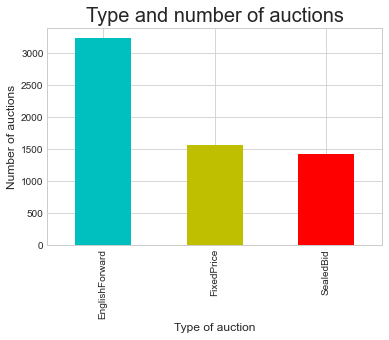

In [80]:
#plot the number of auctions per type of auction with a histogram
fig_1 = data['auction_mech'].value_counts().plot(kind = 'bar', color = ['c','y','r']);

plt.xlabel('Type of auction')
plt.ylabel('Number of auctions')
plt.title('Type and number of auctions', fontsize = 20)

Text(0.5, 1.0, 'Auction type and percentage of lots sold')

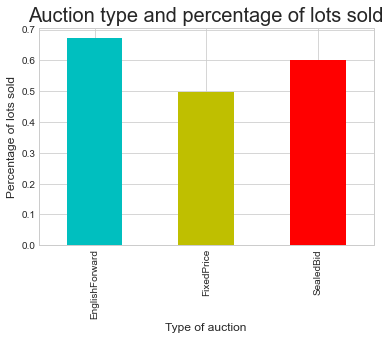

In [83]:
fig_2 = data.groupby('auction_mech')['lots_sold'].mean().plot(kind = 'bar', color = ['c','y','r']);

plt.xlabel('Type of auction')
plt.ylabel('Percentage of lots sold')
plt.title('Auction type and percentage of lots sold', fontsize = 20)

In [ ]:
#histogram with the number of auctions per city
fig_3 = data.groupby('state')['lots_sold'].mean().plot(kind = 'hist', color = ['c','y','r']);


In [76]:
data.plot.scatter('auction_mech',lots_sold.mean())

NameError: name 'lots_sold' is not defined